# Matplotlib Boxplot

One way to plot numerical data is a boxplot. It displays the median, the interquartile range and outliers of the data. 

Simply get that data into an array-like object - list, numpy array, pandas series etc. -  pass it to `plt.boxplot()`, call `plt.show()` and matplotlib will draw a lovely boxplot for you.

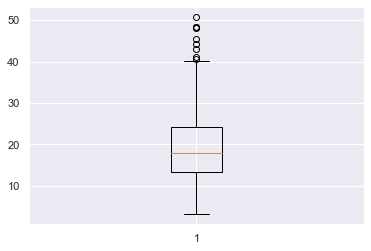

In [90]:
import matplotlib.pyplot as plt

plt.boxplot(data)
plt.show()

The boxplot clearly shows the median of the data (orange line), the upper and lower quartiles (top and bottom parts of the box) and outliers (the circles at the top and/or bottom of the 'whiskers' of the plot). 

There are quite a few things we can do to improve this plot - we don't even know what the data represents! - so let's dive into a more detailed example.

## Matplotlib Boxplot Example

The boxplot is an essential tool you should use when when exploring datasets. The [matplotlib boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot) function accepts a lot of keyword arguments and so can seem quite intimidating if you look at the docs. So, I'll cover the most essential ones that you will use most often. 

Boxplots show the distribution of numerical data, in particular they show if it is [skewed and whether there are unusual observations/outliers](https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch12/5214889-eng.htm). They are very helpful if you are dealing with a large amount of data and want to see a visual summary - in this way, they are similar to [histograms](https://blog.finxter.com/matplotlib-histogram/). They give you ability to compare multiple distributions at the same time because you can plot many boxplots on one Figure. This is not really possible with histograms - any more than 3 and it starts to look crowded. 

As this is an article about how to best work with boxplots, I will not go into detail about how I generated the datasets. However, if you want to follow along, I am using Seaborn's tips dataset and you can find more info [here](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

Let's assume you are a waiter/waitress at a restaurant and you have recorded the total bill in USD for each table you waited from Thursday - Sunday last week. You want to visualize this data to understand which days, if any, are the best to work. The total bill for all the days is stored in `total_bill` and the total bill for each day is stored in the variables `thu`, `fri`, `sat` and `sun` respectively. 

Let's plot total bill and add some info to the axes and a title.

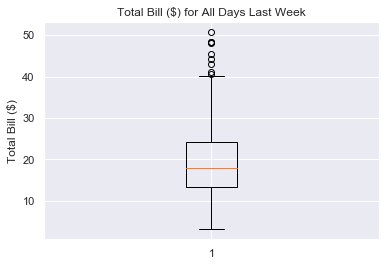

In [91]:
plt.boxplot(total_bill)
plt.title('Total Bill ($) for All Days Last Week')
plt.ylabel('Total Bill ($)')
plt.show()

This looks much better and it is now easy to understand what the boxplot is showing. We can see that the median bill for each table is about 17 USD and that the interquartile range (upper quartile - lower quartile) is from 24 - 14 = 10 USD. There are about 8 outliers where the bill was more than 40 USD and the lowest bill was about 3 USD. 

## Matplotlib Boxplot Multiple

Boxplots let you compare the distributions of different datasets. So, you will almost always want to plot more than one boxplot on a figure. To do this, pass the data you want to plot to `plt.boxplot()` as a list of lists. 

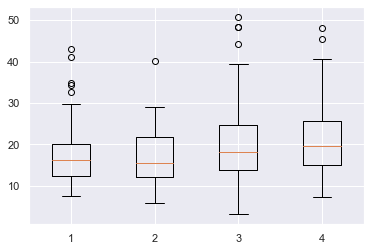

In [92]:
# Create list of lists
all_days = [thu, fri, sat, sun]

# Pass to plt.boxplot()
plt.boxplot(all_days)
plt.show()

Here I combined all the individual datasets into a list of lists `all_days` and passed that to `plt.boxplot()`. Matplotlib automatically places the four boxplots a nice distance apart but does not label the x-axis for us. Let's do that now.

## Matplotlib Boxplot Labels

To label each boxplot, pass a list of strings to the `labels` keyword argument. If you have several labels, I recommend you create this first before passing it to `plt.boxplot()`.

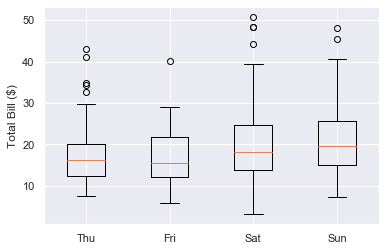

In [106]:
# Create data and labels first
all_days = [thu, fri, sat, sun]
labels = ['Thu', 'Fri', 'Sat', 'Sun']

# Plot data and labels
plt.boxplot(all_days, labels=labels)
plt.ylabel('Total Bill ($)')
plt.show()

Great, now we can see that each boxplot represents the total bill for each day of the week and which day is which. 

Make sure your list of labels is the same length as the number of boxplots and that you pass them in the order you want them to appear. If you don't want to label a particular boxplot, pass an empty string `''`. Finally, you can also pass ints and floats if you desire.

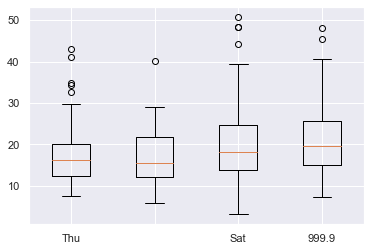

In [107]:
all_days = [thu, fri, sat, sun]

# Second label is an empty string, fourth is a float
labels = ['Thu', '', 'Sat', 999.9]

plt.boxplot(all_days, labels=labels)
plt.show()

Your boxplots look much better now but the matplotlib default settings are quite boring. It's important to make your visualizations engaging and one of the best ways to do this is to add some color. 

## Matplotlib Boxplot Fill Color

To just fill the color of the box, you first need to set `patch_artist=True`. Why is this? 

Under the hood, `plt.boxplot()` returns a dictionary containing each part of the boxplot and these parts are `Line2D` objects. However, by definition, these do not have an `edgecolor` or `facecolor` - lines just have one color. 

To color inside the box, you must turn it into a [`Patch` object](https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.patches.Patch.html) which, by definition, has a `facecolor`.

To modify the box, use the `boxprops` (box properties) keyword argument. It accepts a dictionary and the key-value pair you need is `'facecolor'` plus a color. 

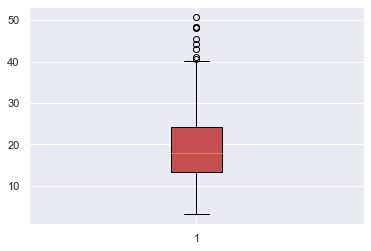

In [108]:
# Turn box into a Patch so that it has a facecolor property
plt.boxplot(total_bill, patch_artist=True,
            # Set facecolor to red
            boxprops=dict(facecolor='r'))
plt.show()

Note that if you don't set `patch_artist=True`, you will get an error.

```python
# Not setting patch_artist=True gives an error
plt.boxplot(total_bill,
            # Set facecolor to red
            boxprops=dict(facecolor='r'))
plt.show()
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-97-d28bb5a14c71> in <module>
      2 plt.boxplot(total_bill,
      3             # Set facecolor to red
----> 4             boxprops=dict(facecolor='r'))
      5 plt.show()
        
AttributeError: 'Line2D' object has no property 'facecolor'
```

If you also want to change the color of the line surrounding the box, pass the additional argument `color=c` for some color `c` to `boxprops`.

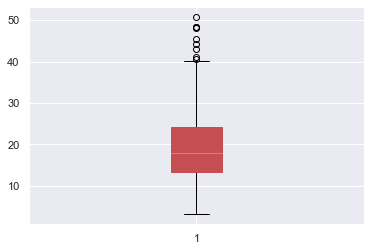

In [99]:
# Turn box into a Patch so that it has a facecolor property
plt.boxplot(total_bill, patch_artist=True,
            # Set facecolor and surrounding line to red
            boxprops=dict(facecolor='r', color='r'))
plt.show()

Perfect, now you know how to change the box's color, let's look at changing the other parts.  

## Matplotlib Boxplot Color

You can change any part of a boxplot to any color you want. 

There are a 6 parts you can color:
1. box - the main body of the boxplot
2. median - horizontal line illustrating the median of the distribution
3. whiskers - vertical lines extending to the most extreme (non-outlier) data points
4. caps -  horizontal lines at the ends of the whiskers
5. fliers  - points above/below the caps representing outliers
6. mean - horizontal line illustrating the mean of the distributions (by default not included)

<div>
    <img src="females_.png" width=400 align="left"/>
</div>

In the above image, I've labelled the first 5 parts but have not included the mean as it is not often used with boxplots.

Each of the parts can be modified by a `<part>props` keyword argument, similar to the `boxprops` one above. 

The available keyword arguments are:
```python
boxprops, medianprops, whisperprops, capprops, flierprops, meanprops
```

For example, write this to set the color of the median line to red
```python
medianprops=dict(color='red')
```

They all accept the `color` keyword argument and the value can be any matplotlib color string. The only different one is `flierprops` which also accepts `markeredgecolor` to color the line around the outliers.

Finally, remember to set `patch_artist=True` if you want to change the fill color of the box. 

Let's look at an example where I turn the entire boxplot red. Since there are so many keyword arguments to pass, I will first create a dictionary and use the [`**` operator](https://blog.finxter.com/what-is-asterisk-in-python/) to unpack it in my `plt.boxplot()` call.


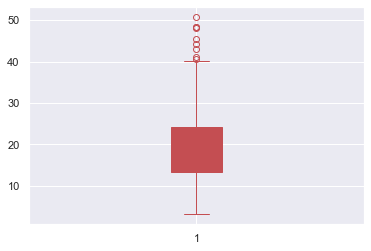

In [100]:
# Set color to red
c = 'r'

# Create dictionary of keyword aruments to pass to plt.boxplot
red_dict =  {'patch_artist': True,
             'boxprops': dict(color=c, facecolor=c),
             'capprops': dict(color=c),
             'flierprops': dict(color=c, markeredgecolor=c),
             'medianprops': dict(color=c),
             'whiskerprops': dict(color=c)}

# Pass dictionary to boxplot using ** operator to unpack it
plt.boxplot(total_bill, **red_dict)
plt.show()

First I created a variable `c` to hold the color string in. This means that if I want to change the color to green, I only have to change one line of code - `c = 'g'` - and it will change the color everywhere. 

Then I created `red_dict` where the key-value pairs is a string and dictionary. The first key is `patch_artists=True` and the other keys are the `<part>props` keyword argument. Finally, I created a boxplot of `total_bill` and colored it red by unpacking `red_dict` with the `**` operator. 

If you want to brush up on your dictionary knowledge, check out my article [the ultimate guide to dictionaries](https://blog.finxter.com/python-dictionary/).

<div>
    <img src="black_line.png" align="left" width=400 />
</div?

The red plot is much more engaging than the standard matplotlib colors. But, because the median line was the same color as everything else, you lost some information it was showing. One way to rectify this is to set to median line to black with`'medianprops': dict(color='k')` in `red_dict`. The result is shown above. 

## Matplotlib Boxplot Width

To change the width of a boxplot, pass a float to to the `widths` keyword argument in `plt.boxplot()`. It represents the fraction of space the box takes up on the figure.

If you have one boxplot, the scalar represents the percentage of the plot the box takes up.

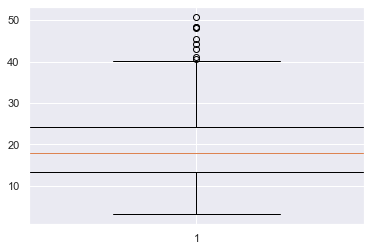

In [78]:
plt.boxplot(total_bill, widths=1)
plt.show()

Here the box takes up 100% of the width as `widths=1`. 

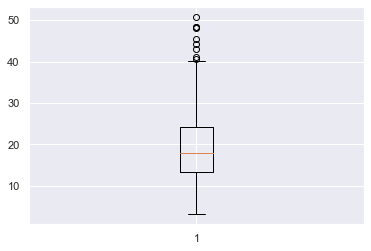

In [101]:
plt.boxplot(total_bill, widths=0.1)
plt.show()

Here the box only takes up 10% of the space as `widths=0.1`.

If you plot multiple boxplots on the same figure and pass a float to `widths`, all boxes will be resized to take up that fraction of space in their area of the plot.

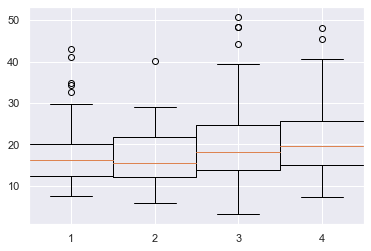

In [109]:
# Boxes take up 100% of their allocated space
plt.boxplot(all_days, widths=1)
plt.show()

Here each boxplot takes up 100% of the space allocated as `widths=1`.

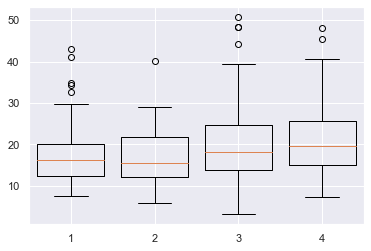

In [110]:
# Boxes take up 80% of their allocated space
plt.boxplot(all_days, widths=0.8)
plt.show()

Here each boxplot takes up 80% of the space allocated to them as `widths=0.8`. 

You can set the width of each boxplot individually by passing a list to `widths` instead of a scalar. 

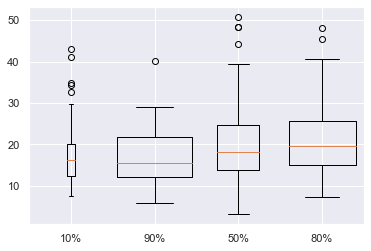

In [83]:
plt.boxplot(all_days, widths=[0.1, 0.9, 0.5, 0.8], labels=['10%', '90%', '50%', '80%'])
plt.show()

Here I have labelled the amount of horizontal space each box takes up. Although it is possible to do this, I do not recommend it. It adds another dimension to your boxplot but isn't showing any new information. I personally think that `widths=0.8` looks best, but you are free to choose any size you want. Just make sure that your boxplots are the same width so as not to confuse your reader. 

## Matplotlib Boxplot Horizontal

To create a horizonal boxplot in matplotlib, set the `vert` keyword argument to `False`.

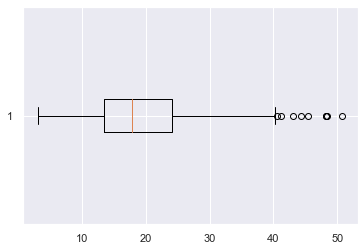

In [69]:
plt.boxplot(total_bill, vert=False)
plt.show()

## Conclusion

That's it, you now know all the basics of boxplots in matplotlib! 

You've learned how to plot single and multiple boxplots on one figure. You can label them whatever you want and change the color of any of the 6 parts to anything you can imagine. Finally, you've learned to customize the width of your plots and plot horizontal ones as well. 

There is still more to be learned about boxplots such as changing the outlier marker, adding legends, sorting them by groups and even working with them and the pandas library. But I'll leave that for another article. 

## Where To Go From Here?

Do you wish you could be a programmer full-time but don’t know how to start?

Check out the pure value-packed webinar where Chris – creator of Finxter.com – teaches you to become a Python freelancer in 60 days or your money back!

https://tinyurl.com/become-a-python-freelancer

It doesn’t matter if you’re a Python novice or Python pro. If you are not making six figures/year with Python right now, you will learn something from this webinar.

These are proven, no-BS methods that get you results fast.

This webinar won’t be online forever. Click the link below before the seats fill up and learn how to become a Python freelancer, guaranteed.

https://tinyurl.com/become-a-python-freelancer